In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


C:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Cargar la base de datos. 

df_PaySim=pd.read_csv("PS_20174392719_1491204439457_log.csv")
df_PaySim

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
# Cambio de nombre de las columnas
column_mapping = {
    'step': 'tiempo',
    'type': 'tipo_transaccion',
    'amount': 'monto',
    'nameOrig': 'nombre_cliente_titular',
    'oldbalanceOrg': 'saldo_antes_titular',
    'newbalanceOrig': 'saldo_despues_titular',
    'nameDest': 'nombre_cliente_beneficiario',
    'oldbalanceDest': 'saldo_antes_beneficiario',
    'newbalanceDest': 'saldo_despues_beneficiario',
    'isFraud': 'es_fraude',
    'isFlaggedFraud': 'fraude2'
}

# Aplicar los cambios
df_PaySim.rename(columns=column_mapping, inplace=True)

# Mostrar datos
df_PaySim.head()

,tiempo,tipo_transaccion,monto,nombre_cliente_titular,saldo_antes_titular,saldo_despues_titular,nombre_cliente_beneficiario,saldo_antes_beneficiario,saldo_despues_beneficiario,es_fraude,fraude2
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Configurar Pandas para mostrar números completos
pd.set_option('display.float_format', '{:.2f}'.format)

# Mostrar resumen de la base de datos sin notación científica
df_PaySim.describe()


,tiempo,monto,saldo_antes_titular,saldo_despues_titular,saldo_antes_beneficiario,saldo_despues_beneficiario,es_fraude,fraude2
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [5]:
df_PaySim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   tiempo                       int64  
 1   tipo_transaccion             object 
 2   monto                        float64
 3   nombre_cliente_titular       object 
 4   saldo_antes_titular          float64
 5   saldo_despues_titular        float64
 6   nombre_cliente_beneficiario  object 
 7   saldo_antes_beneficiario     float64
 8   saldo_despues_beneficiario   float64
 9   es_fraude                    int64  
 10  fraude2                      int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
#datos perdidos
df_PaySim.isna().sum()

tiempo                         0
tipo_transaccion               0
monto                          0
nombre_cliente_titular         0
saldo_antes_titular            0
saldo_despues_titular          0
nombre_cliente_beneficiario    0
saldo_antes_beneficiario       0
saldo_despues_beneficiario     0
es_fraude                      0
fraude2                        0
dtype: int64

In [7]:
#Datos duplicados
df_PaySim.duplicated().sum()

0

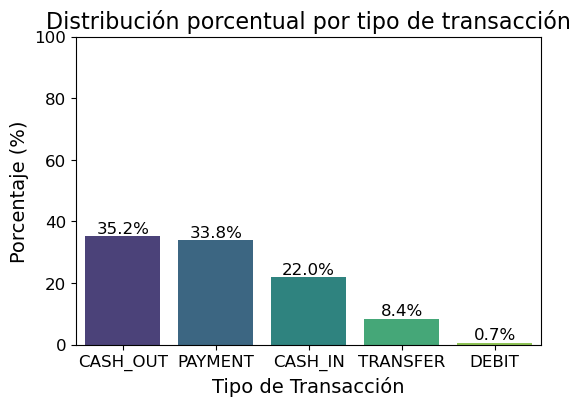

In [8]:
# Calcular el porcentaje de cada categoría
percentages = (df_PaySim['tipo_transaccion'].value_counts(normalize=True) * 100).reset_index()
percentages.columns = ['tipo_transaccion', 'percentage']

# Crear el gráfico de barras con porcentajes
plt.figure(figsize=(6, 4))
sns.barplot(data=percentages, x='tipo_transaccion', y='percentage', palette='viridis')

# Añadir etiquetas con los porcentajes en cada barra
for i, row in percentages.iterrows():
    plt.text(
        x=i, 
        y=row['percentage'] + 1,  # Ajustar ligeramente la posición de la etiqueta
        s=f"{row['percentage']:.1f}%", 
        ha='center', 
        fontsize=12
    )

# Configurar títulos y etiquetas
plt.title("Distribución porcentual por tipo de transacción", fontsize=16)
plt.xlabel("Tipo de Transacción", fontsize=14)
plt.ylabel("Porcentaje (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)  

plt.show()

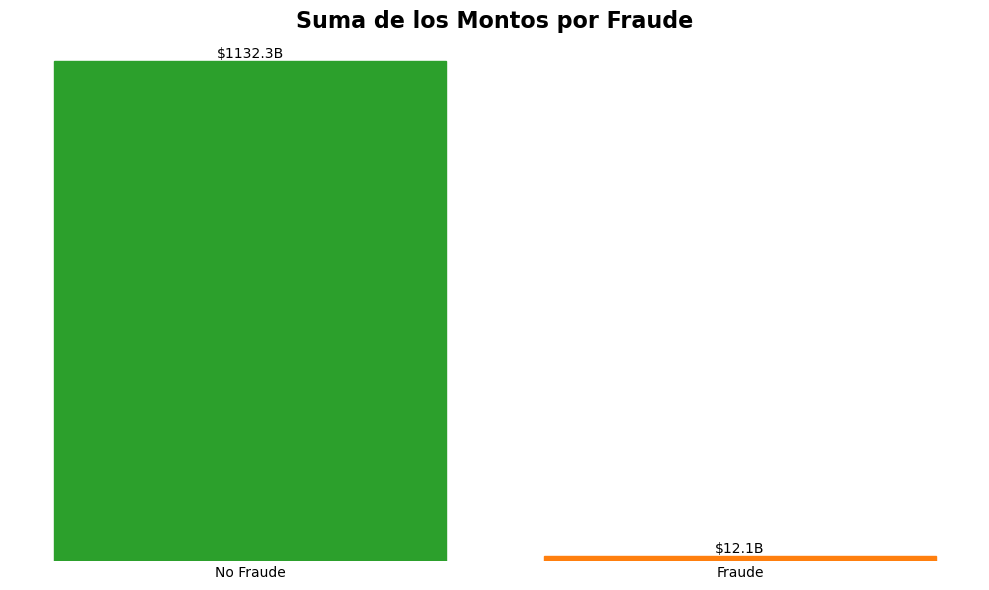

In [9]:
# Calcular la suma de 'amount' por fraude en miles de millones
suma_no_fraude = df_PaySim[df_PaySim['es_fraude'] == 0]['monto'].sum() / 1e9
suma_fraude = df_PaySim[df_PaySim['es_fraude'] == 1]['monto'].sum() / 1e9

# Crear el histograma
plt.figure(figsize=(10, 6))
barplot = plt.bar(['No Fraude', 'Fraude'], 
                  [suma_no_fraude, suma_fraude])


barplot[0].set_color('#2ca02c')  
barplot[1].set_color('#ff7f0e')  

plt.title('Suma de los Montos por Fraude', fontsize=16, fontweight='bold')

# Ocultar los ejes y etiquetas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)

# Agregar el monto
for bar, monto in zip(barplot, [suma_no_fraude, suma_fraude]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, 
             f'${monto:.1f}B', ha='center', va='bottom')

plt.grid(False)
plt.tight_layout()
plt.show()



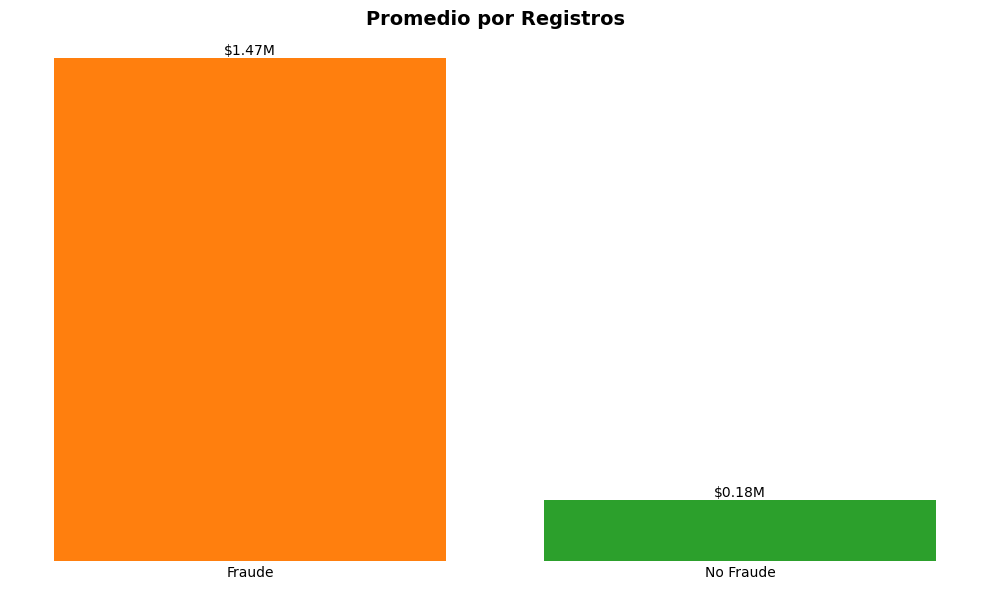

In [10]:
# Calcula la suma de los montos para registros de fraude y no fraude
suma_montos_fraude = df_PaySim[df_PaySim['es_fraude'] == 1]['monto'].sum()/1e6
suma_montos_no_fraude = df_PaySim[df_PaySim['es_fraude'] == 0]['monto'].sum()/1e6

# Calcula el número de registros de fraude y no fraude
registros_fraude = df_PaySim['es_fraude'].sum()
registros_no_fraude = len(df_PaySim) - registros_fraude

# Calcula el promedio por registros
razon_fraude = suma_montos_fraude / registros_fraude
razon_no_fraude = suma_montos_no_fraude / registros_no_fraude

# Grafica la razón entre la suma de montos y el número de registros para fraude y no fraude
plt.figure(figsize=(10, 6))
barplot = plt.bar(['Fraude', 'No Fraude'], [razon_fraude, razon_no_fraude], color=['#ff7f0e', '#2ca02c']) 
plt.title('Promedio por Registros', fontsize=14, fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

# Agrega etiquetas con el número encima de cada barra
for barra in barplot:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'${altura:.2f}M', ha='center', va='bottom')

plt.gca().axes.yaxis.set_ticklabels([])
plt.grid(False)
plt.tight_layout()
plt.show()


In [11]:
# Agrupar por tipo de transacción y contar los fraudes (es_fraude == 1)
df_fraudes = df_PaySim[df_PaySim['es_fraude'] == 1].groupby('tipo_transaccion').size().reset_index(name='fraudes')

print(df_fraudes)


  tipo_transaccion  fraudes
0         CASH_OUT     4116
1         TRANSFER     4097


In [12]:
print('\n Los tipos de transacciones fraudulentas son {}'.format(\
    list(df_PaySim.loc[df_PaySim.es_fraude == 1].tipo_transaccion.drop_duplicates().values))) # solo 'CASH_OUT' # & 'TRANSFER'

dfFraudTransfer = df_PaySim.loc[(df_PaySim.es_fraude == 1) & (df_PaySim.tipo_transaccion == 'TRANSFER')]
dfFraudCashout = df_PaySim.loc[(df_PaySim.es_fraude == 1) & (df_PaySim.tipo_transaccion == 'CASH_OUT')]

print ('\n El número de TRANSFER fraudulentas = {}'.\
       format(len(dfFraudTransfer))) # 4097

print ('\n El número de CASH_OUTs fraudulentas = {}'.\
       format(len(dfFraudCashout))) # 4116



 Los tipos de transacciones fraudulentas son ['TRANSFER', 'CASH_OUT']

 El número de TRANSFER fraudulentas = 4097

 El número de CASH_OUTs fraudulentas = 4116


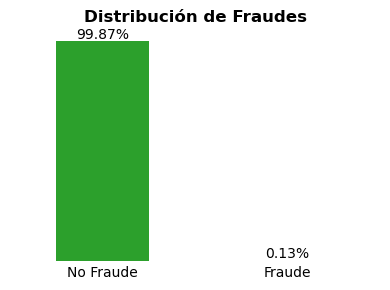

In [13]:
conteo = df_PaySim['es_fraude'].value_counts()

# Crear el gráfico
plt.figure(figsize=(4, 3))
ax = conteo.plot(kind='bar', color=['#2ca02c', '#ff7f0e'], edgecolor='none')  
plt.title('Distribución de Fraudes', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1], ['No Fraude', 'Fraude'], rotation=0)
plt.tick_params(axis='y', which='both', left=False)

# Ocultar línea superior y derecha del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)

# Agregar porcentaje
total = sum(conteo)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 80000, f"{round((i.get_height() / total) * 100, 2)}%", ha='center')

plt.grid(False)
plt.tight_layout()
plt.show()


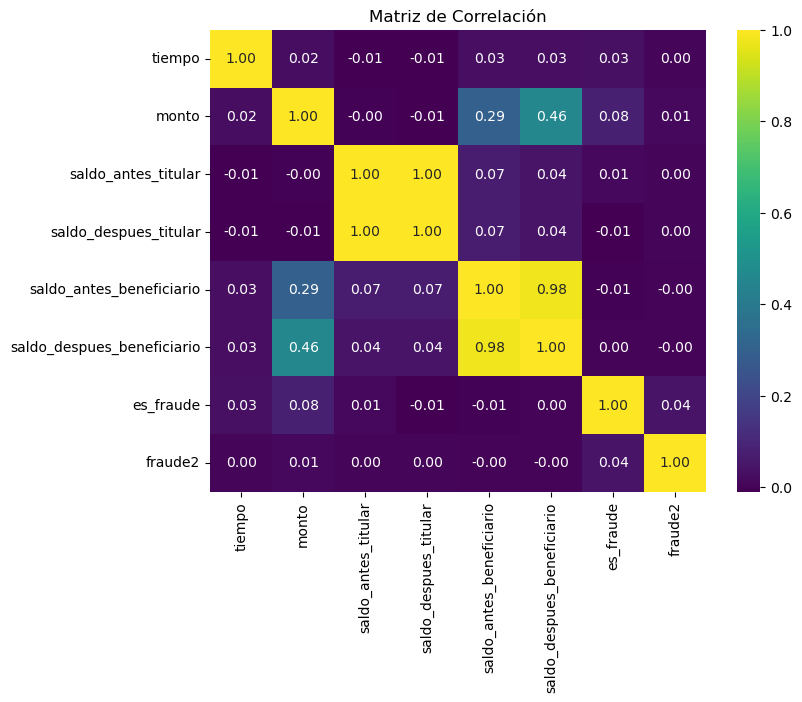

In [14]:
# Filtrar columnas numéricas
columnas_numericas = df_PaySim.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='viridis', fmt=".2f")  
plt.title("Matriz de Correlación")
plt.show()


In [15]:
# Teniendo en cuenta el análisis anterior, solo se tendrá en cuenta los tipos de transacciones: CASH_OUT

df_PaySim1 = df_PaySim.loc[(df_PaySim.tipo_transaccion == 'CASH_OUT')]
df_PaySim1

,tiempo,tipo_transaccion,monto,nombre_cliente_titular,saldo_antes_titular,saldo_despues_titular,nombre_cliente_beneficiario,saldo_antes_beneficiario,saldo_despues_beneficiario,es_fraude,fraude2
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.00,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.00,C824009085,70253.00,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0


In [16]:
#ELIMIAR LOS CEROS DE LAS VARIABLES
import pandas as pd

df_PaySim1 = df_PaySim1[(df_PaySim1['saldo_despues_titular'] != 0.0) | (df_PaySim1['es_fraude'] != 0)]

df_PaySim1

,tiempo,tipo_transaccion,monto,nombre_cliente_titular,saldo_antes_titular,saldo_despues_titular,nombre_cliente_beneficiario,saldo_antes_beneficiario,saldo_despues_beneficiario,es_fraude,fraude2
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
70,1,CASH_OUT,47458.86,C527211736,209534.84,162075.98,C2096057945,52120.00,0.00,0,0
71,1,CASH_OUT,136872.92,C1533123860,162075.98,25203.05,C766572210,217806.00,0.00,0,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
665,1,CASH_OUT,227768.63,C1445424568,1011466.31,783697.68,C1023714065,530123.48,1412484.09,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.00,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0


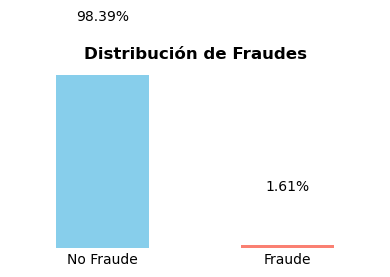

In [17]:
conteo = df_PaySim1['es_fraude'].value_counts()

#Crear el gráfico
plt.figure(figsize=(4, 3))
ax = conteo.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='none')
plt.title('Distribución de Fraudes', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1], ['No Fraude', 'Fraude'], rotation=0)
plt.tick_params(axis='y', which='both', left=False)

#Ocultar línea superior y derecha del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis='both', which='both', length=0)

#Agregar porcentaje
total = sum(conteo)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 80000, f"{round((i.get_height() / total) * 100, 2)}%", ha='center')

plt.grid(False)
plt.tight_layout()
plt.show()

In [18]:
df_PaySim1["es_fraude"].value_counts()

es_fraude
0    252288
1      4116
Name: count, dtype: int64

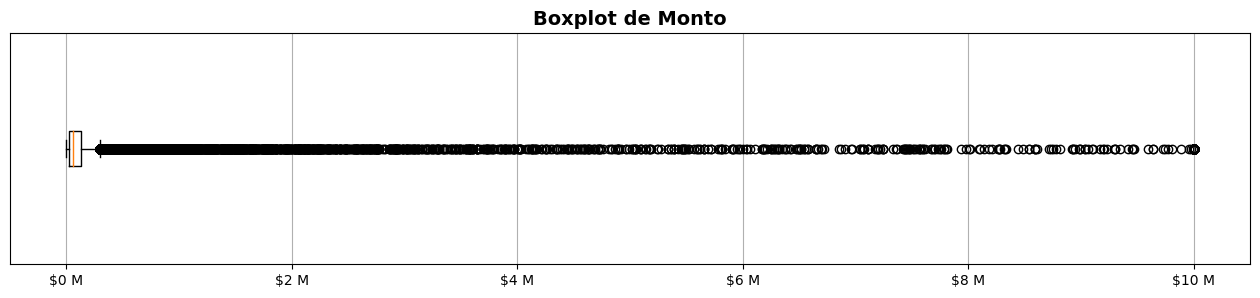

In [19]:
import matplotlib.ticker as ticker  # Import the ticker module
# @title
#Crear el boxplot de la variable 'amount'
plt.figure(figsize=(16, 3))
plt.boxplot(df_PaySim1['monto'], vert=False)
plt.title('Boxplot de Monto', fontsize=14, fontweight='bold')

# Your plotting code
plt.yticks([])
plt.grid(axis='x')
formatter = ticker.FuncFormatter(lambda x, _: f'${x / 1e6:.0f} M')
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

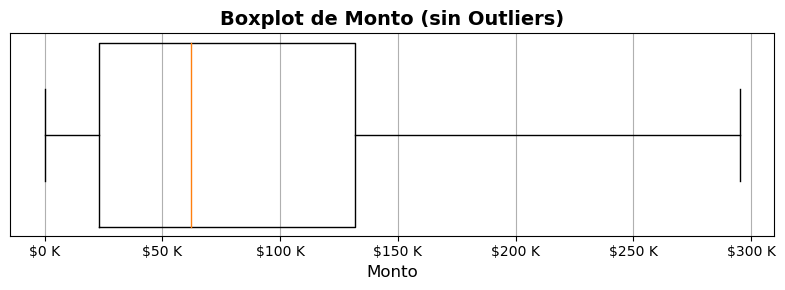

In [20]:
# @title
#Crear el boxplot 'amount' snin outliers
plt.figure(figsize=(8, 3))
plt.boxplot(df_PaySim1['monto'], vert=False, showfliers=False, widths=10)
plt.title('Boxplot de Monto (sin Outliers)', fontsize=14, fontweight='bold')
plt.xlabel('Monto', fontsize=12)
plt.yticks([])
plt.grid(axis='x')
formatter = ticker.FuncFormatter(lambda x, _: f'${x / 1e3:.0f} K')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [21]:
# Cambiar el tipo de datos

df_PaySim1['Hour'] = df_PaySim1['tiempo'] % 24

df_PaySim1['Hour'] = df_PaySim1['Hour'].astype('object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_7824\4089024716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PaySim1['Hour'] = df_PaySim1['tiempo'] % 24
C:\Users\Admin\AppData\Local\Temp\ipykernel_7824\4089024716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PaySim1['Hour'] = df_PaySim1['Hour'].astype('object')


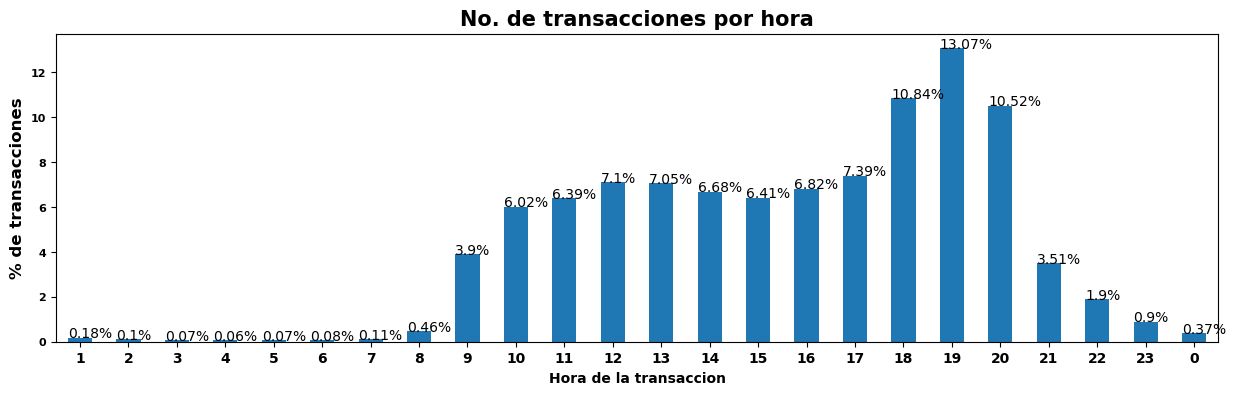

In [22]:
plt.figure(figsize=(15,4))
ax = (df_PaySim1['Hour'].value_counts(sort=False, normalize=True) * 100).round(2).plot(kind='bar')
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=10, color='black')
plt.xlabel('Hora de la transaccion', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold', rotation=0)
plt.ylabel('% de transacciones', fontsize=12, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.title('No. de transacciones por hora', fontsize=15, fontweight='bold')
plt.show()

In [23]:
df_PaySim1_fraude = df_PaySim1.loc[df_PaySim1.es_fraude == 1]

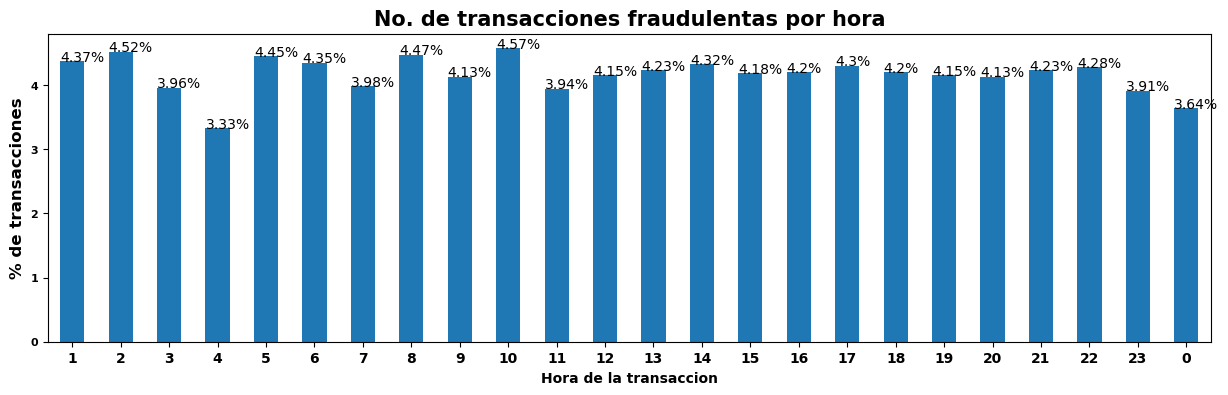

In [24]:
plt.figure(figsize=(15,4))
ax = (df_PaySim1_fraude['Hour'].value_counts(sort=False, normalize=True) * 100).round(2).plot(kind='bar')
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=10, color='black')
plt.xlabel('Hora de la transaccion', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold', rotation=0)
plt.ylabel('% de transacciones', fontsize=12, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.title('No. de transacciones fraudulentas por hora', fontsize=15, fontweight='bold')
plt.show()

In [25]:
# Seleccionar variables relevantes para el modelo, No se considera la variable type ya que solo se dejo la categoria CASH_OUT
variables_relevantes = [
    'tiempo', 'monto', 'saldo_antes_titular', 'saldo_despues_beneficiario'
]

In [26]:
# Crear el nuevo DataFrame con las variables seleccionadas
df_modelo = df_PaySim1[variables_relevantes + ['es_fraude']]

In [27]:
df_modelo

,tiempo,monto,saldo_antes_titular,saldo_despues_beneficiario,es_fraude
3,1,181.00,181.00,0.00,1
70,1,47458.86,209534.84,0.00,0
71,1,136872.92,162075.98,0.00,0
252,1,2806.00,2806.00,0.00,1
665,1,227768.63,1011466.31,1412484.09,0
...,...,...,...,...,...
6362611,742,63416.99,63416.99,339850.17,1
6362613,743,1258818.82,1258818.82,1762283.33,1
6362615,743,339682.13,339682.13,339682.13,1
6362617,743,6311409.28,6311409.28,6379898.11,1


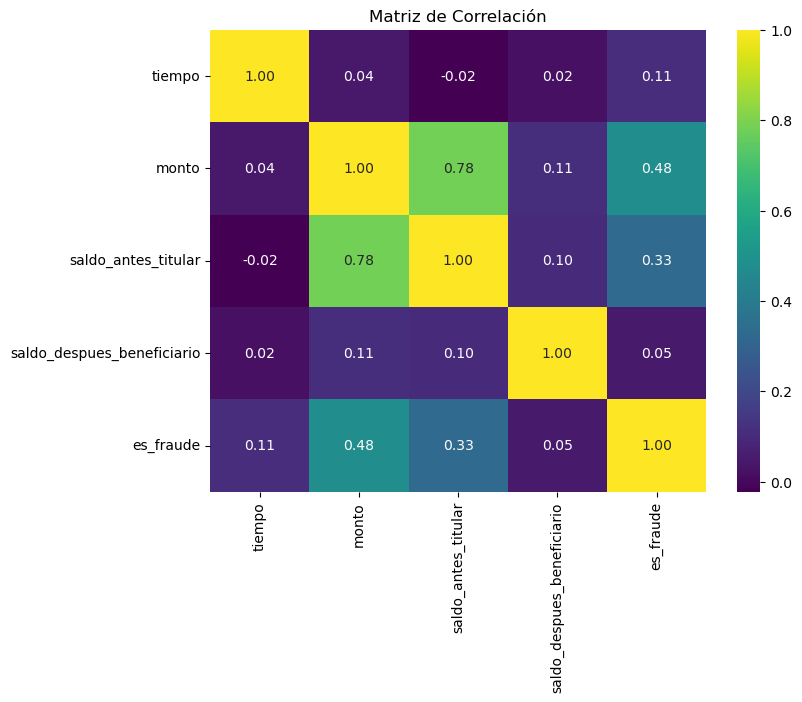

In [28]:
# Filtrar columnas numéricas
columnas_numericas = df_modelo.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='viridis', fmt=".2f")  # Cambiado a 'viridis'
plt.title("Matriz de Correlación")
plt.show()


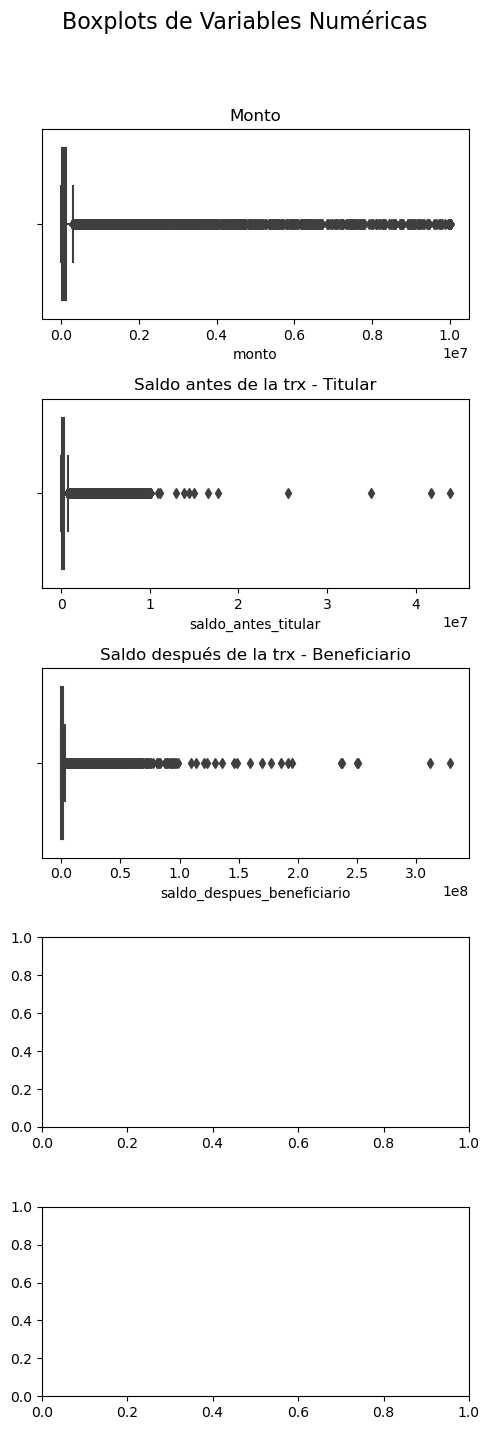

In [29]:
# Crear una figura con espacio para 5 subplots
fig, axs = plt.subplots(5, 1, figsize=(5, 15))  # 5 filas, 1 columna
fig.suptitle('Boxplots de Variables Numéricas', fontsize=16)

# Gráficos de caja (boxplots) para cada variable
sns.boxplot(data=df_modelo, x='monto', ax=axs[0])
axs[0].set_title('Monto')

sns.boxplot(data=df_modelo, x='saldo_antes_titular', ax=axs[1])
axs[1].set_title('Saldo antes de la trx - Titular')

sns.boxplot(data=df_modelo, x='saldo_despues_beneficiario', ax=axs[2])
axs[2].set_title('Saldo después de la trx - Beneficiario')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar la figura
plt.show()


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)
from imblearn.over_sampling import RandomOverSampler
import time


In [31]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Verificar estructura del dataframe
print(df_modelo.info())

# Si hay valores nulos, puedes manejarlos aquí
print("Valores nulos:\n", df_modelo.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 256404 entries, 3 to 6362619
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   tiempo                      256404 non-null  int64  
 1   monto                       256404 non-null  float64
 2   saldo_antes_titular         256404 non-null  float64
 3   saldo_despues_beneficiario  256404 non-null  float64
 4   es_fraude                   256404 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 11.7 MB
None
Valores nulos:
 tiempo                        0
monto                         0
saldo_antes_titular           0
saldo_despues_beneficiario    0
es_fraude                     0
dtype: int64


In [33]:
# Separar características y variable objetivo
X = df_modelo.drop(columns='es_fraude')
y = df_modelo['es_fraude']

# Aplicar balanceo de clases
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X, y)

# Verificar distribución de clases después del balanceo
print("Distribución de clases después del balanceo:")
print(y_balanced.value_counts())


Distribución de clases después del balanceo:
es_fraude
1    252288
0    252288
Name: count, dtype: int64


In [34]:
# Dividir los datos balanceados
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


El modelo Regresión Logística NO parece estar sobreajustado.
Entrenamiento del modelo Regresión Logística completado. Tiempo transcurrido: 1 segundos.

El modelo Árbol de Decisión NO parece estar sobreajustado.
Entrenamiento del modelo Árbol de Decisión completado. Tiempo transcurrido: 2 segundos.

El modelo Random Forest NO parece estar sobreajustado.
Entrenamiento del modelo Random Forest completado. Tiempo transcurrido: 15 segundos.

Modelo: Regresión Logística
Accuracy (Train): 93.49%
Precision (Train): 93.18%
Recall (Train): 93.85%
F1-Score (Train): 93.51%
AUC-ROC (Train): 98.65%
Accuracy (Test): 93.49%
Precision (Test): 93.19%
Recall (Test): 93.85%
F1-Score (Test): 93.52%
AUC-ROC (Test): 98.64%
Matriz de Confusión (Train):
[[164463  12138]
 [ 10867 165735]]


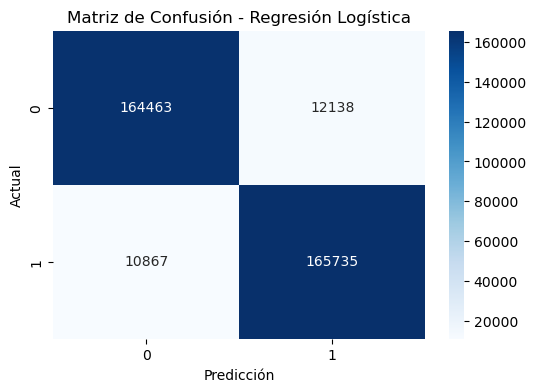

Matriz de Confusión (Test):
[[70497  5190]
 [ 4658 71028]]


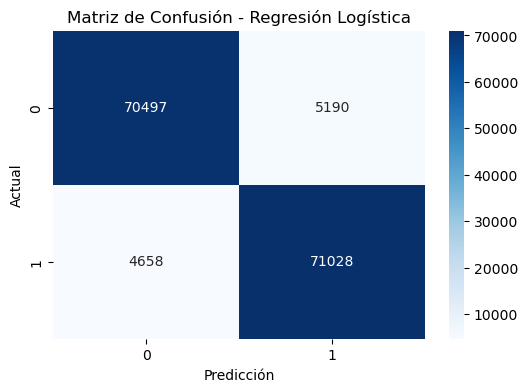

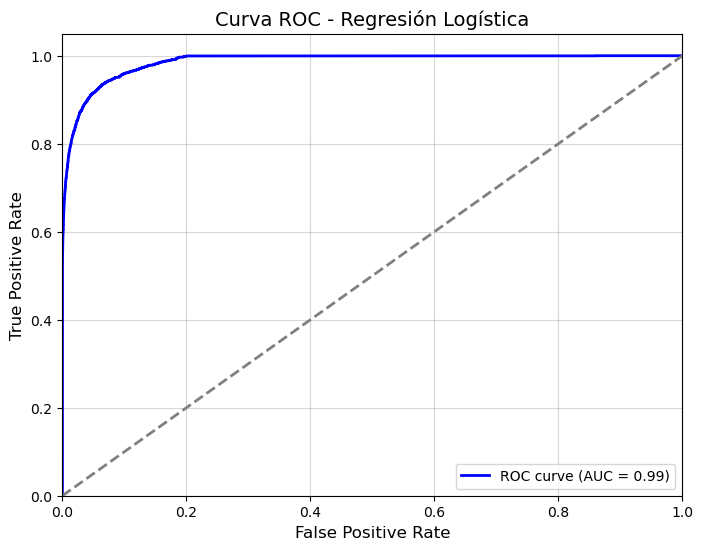

Reporte de clasificación (Test):
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     75687
           1       0.93      0.94      0.94     75686

    accuracy                           0.93    151373
   macro avg       0.93      0.93      0.93    151373
weighted avg       0.93      0.93      0.93    151373



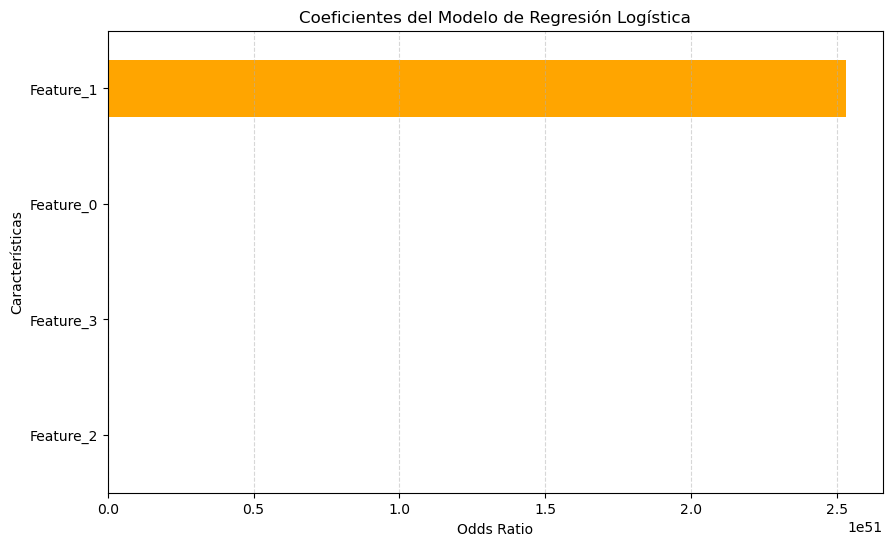

*********************************************************************

Modelo: Árbol de Decisión
Accuracy (Train): 100.0%
Precision (Train): 100.0%
Recall (Train): 100.0%
F1-Score (Train): 100.0%
AUC-ROC (Train): 100.0%
Accuracy (Test): 99.81%
Precision (Test): 99.62%
Recall (Test): 100.0%
F1-Score (Test): 99.81%
AUC-ROC (Test): 99.81%
Matriz de Confusión (Train):
[[176601      0]
 [     0 176602]]


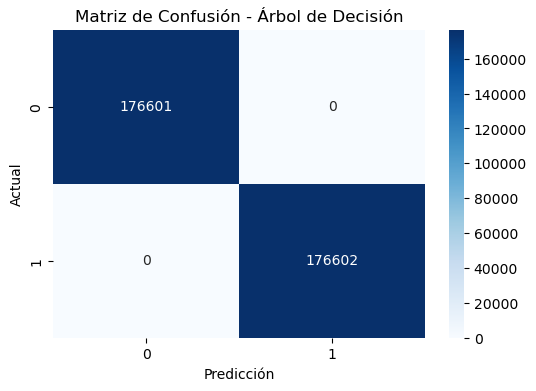

Matriz de Confusión (Test):
[[75402   285]
 [    0 75686]]


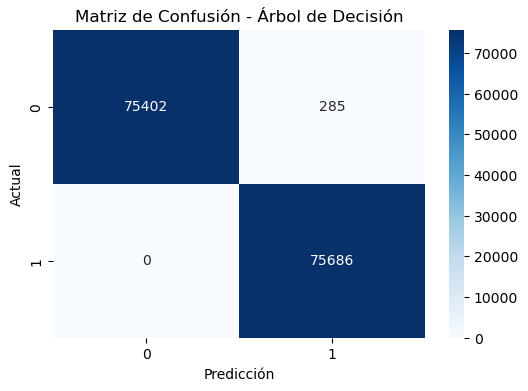

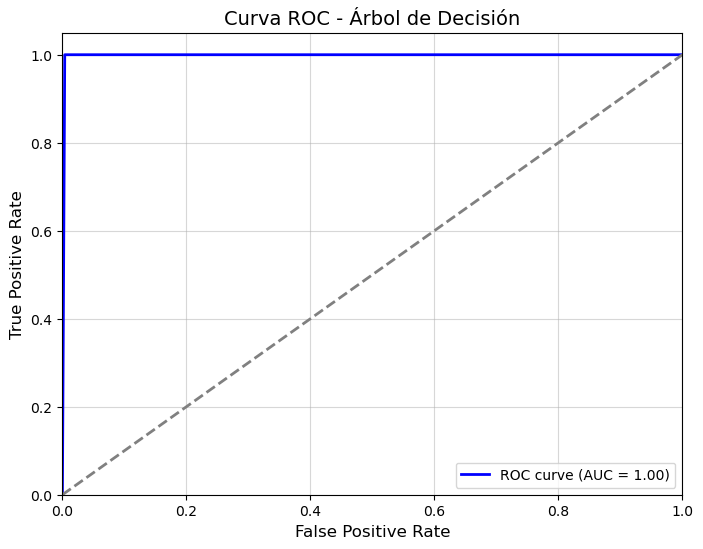

Reporte de clasificación (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75687
           1       1.00      1.00      1.00     75686

    accuracy                           1.00    151373
   macro avg       1.00      1.00      1.00    151373
weighted avg       1.00      1.00      1.00    151373



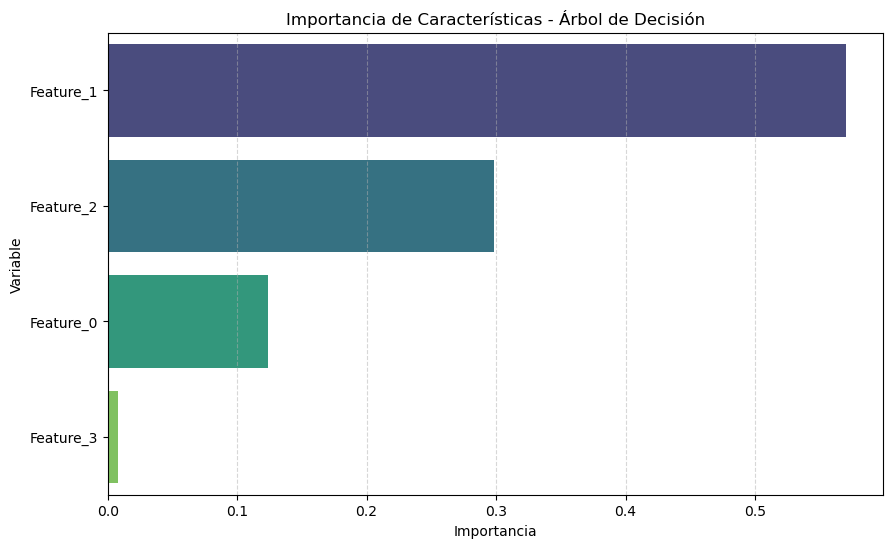

*********************************************************************

Modelo: Random Forest
Accuracy (Train): 100.0%
Precision (Train): 100.0%
Recall (Train): 100.0%
F1-Score (Train): 100.0%
AUC-ROC (Train): 100.0%
Accuracy (Test): 99.89%
Precision (Test): 99.78%
Recall (Test): 100.0%
F1-Score (Test): 99.89%
AUC-ROC (Test): 100.0%
Matriz de Confusión (Train):
[[176598      3]
 [     0 176602]]


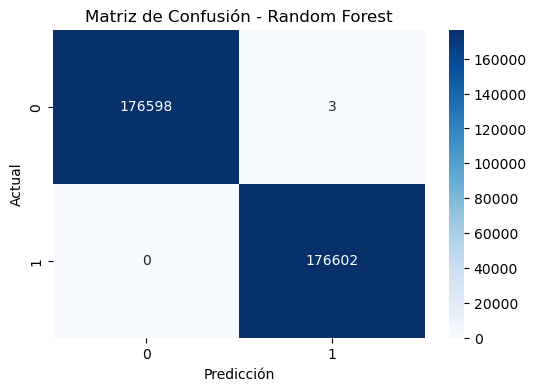

Matriz de Confusión (Test):
[[75523   164]
 [    0 75686]]


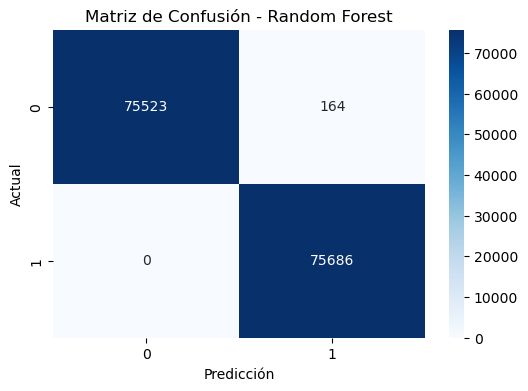

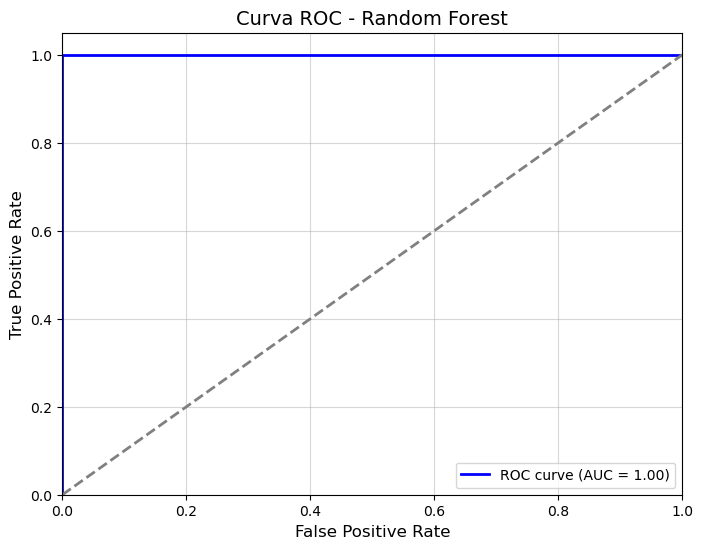

Reporte de clasificación (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75687
           1       1.00      1.00      1.00     75686

    accuracy                           1.00    151373
   macro avg       1.00      1.00      1.00    151373
weighted avg       1.00      1.00      1.00    151373



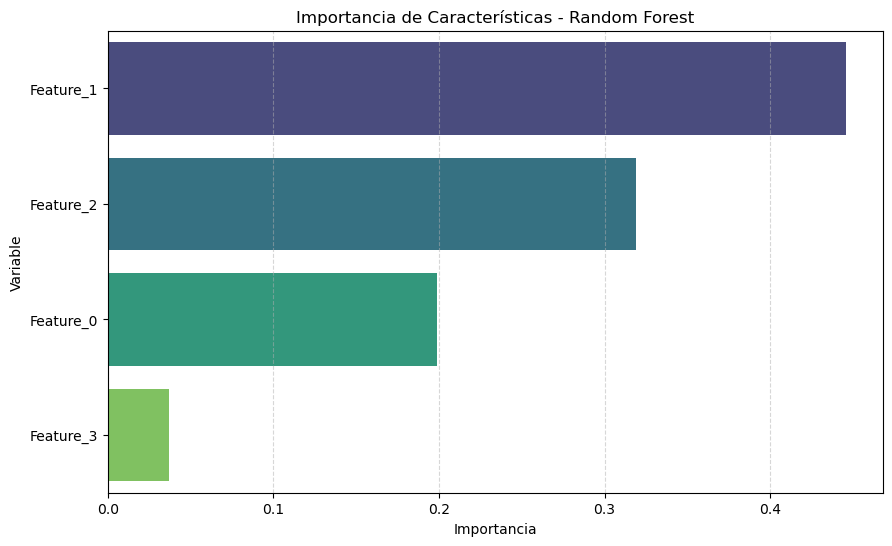

*********************************************************************



In [35]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Función para entrenar y evaluar modelos
def entrenar_modelo(nombre, model, X_train, X_test, y_train, y_test):
    start_time = time.time()

    # Entrenamiento
    model.fit(X_train, y_train)

    # Predicciones y métricas en train
    predictions_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, predictions_train)
    prec_train = precision_score(y_train, predictions_train)
    recall_train = recall_score(y_train, predictions_train)
    f1_value_train = f1_score(y_train, predictions_train)
    auc_roc_value_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

    # Predicciones y métricas en test
    predictions_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions_test)
    prec_test = precision_score(y_test, predictions_test)
    recall_test = recall_score(y_test, predictions_test)
    f1_value_test = f1_score(y_test, predictions_test)
    auc_roc_value_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Matrices de confusión para train y test
    matriz_train = confusion_matrix(y_train, predictions_train)
    matriz_test = confusion_matrix(y_test, predictions_test)

    # Reporte de clasificación
    classification_rep = classification_report(y_test, predictions_test)

    # Determinar si hay sobreajuste
    train_auc = auc_roc_value_train
    test_auc = auc_roc_value_test
    if train_auc - test_auc > 0.1:
        overfit_msg = f"El modelo {nombre} puede estar sobreajustado."
    else:
        overfit_msg = f"El modelo {nombre} NO parece estar sobreajustado."
    print(overfit_msg)

    # Importancia de las características (solo para árboles de decisión y bosques aleatorios)
    feature_importance = None
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_

    # Tiempo de entrenamiento
    end_time = time.time()
    duration = end_time - start_time

    print(f"Entrenamiento del modelo {nombre} completado. Tiempo transcurrido: {duration:.0f} segundos.\n")

    return {
        'Nombre_Modelo': nombre,
        'Modelo': model,
        'Accuracy_Train': accuracy_train,
        'Precision_Train': prec_train,
        'Recall_Train': recall_train,
        'F1_Score_Train': f1_value_train,
        'AUC_ROC_Train': auc_roc_value_train,
        'Accuracy_Test': accuracy_test,
        'Precision_Test': prec_test,
        'Recall_Test': recall_test,
        'F1_Score_Test': f1_value_test,
        'AUC_ROC_Test': auc_roc_value_test,
        'Matriz_Confusión_Train': matriz_train,
        'Matriz_Confusión_Test': matriz_test,
        'Classification_Report': classification_rep,
        'Feature_Importance': feature_importance,
        'Sobreajuste': overfit_msg
    }

# Función para graficar matriz de confusión
def plot_confusion_matrix(matriz, nombre_modelo, clases):
    plt.figure(figsize=(6, 4))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.show()

# Función para graficar curva ROC
def plot_roc_curve(y_true, y_prob, nombre_modelo):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'Curva ROC - {nombre_modelo}', fontsize=14)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.5)
    plt.show()

# Función para graficar importancia de las características
def plot_feature_importance(model, feature_names, nombre_modelo):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        
        # Crear un DataFrame con la importancia de las características
        df_importance = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
        
        # Ordenar por importancia
        df_importance = df_importance.sort_values(by='Importancia', ascending=False)

        # Graficar
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importancia', y='Variable', data=df_importance, palette='viridis')
        plt.title(f'Importancia de Características - {nombre_modelo}')
        plt.xlabel('Importancia')
        plt.ylabel('Variable')
        plt.grid(axis='x', linestyle='--', alpha=0.5)
        plt.show()

# Función para graficar coeficientes de regresión logística
def plot_logistic_coefficients(model, feature_names):
    coef = model.coef_[0]
    odds_ratios = pd.Series(np.exp(coef), index=feature_names)
    
    # Graficar coeficientes
    plt.figure(figsize=(10, 6))
    odds_ratios.sort_values().plot(kind='barh', color='orange')
    plt.title('Coeficientes del Modelo de Regresión Logística')
    plt.xlabel('Odds Ratio')
    plt.ylabel('Características')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

# Definir los modelos
modelos = [
    ('Regresión Logística', LogisticRegression(max_iter=10000)),
    ('Árbol de Decisión', DecisionTreeClassifier(max_depth=50)),
    ('Random Forest', RandomForestClassifier(n_estimators=30, max_depth=50)),
]

# Verificar si X_train es un numpy.ndarray o un DataFrame
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    # Si es un numpy.ndarray, necesitarás tener las características almacenadas en alguna variable
    feature_names = ['Feature_' + str(i) for i in range(X_train.shape[1])]

# Entrenar y evaluar los modelos
resultados = []
for nombre, modelo in modelos:
    resultado = entrenar_modelo(nombre, modelo, X_train, X_test, y_train, y_test)
    resultados.append(resultado)

# Mostrar resultados y graficar matrices de confusión, curvas ROC e importancia de características
for result in resultados:
    print(f"Modelo: {result['Nombre_Modelo']}")
    print(f"Accuracy (Train): {round(result['Accuracy_Train']*100, 2)}%")
    print(f"Precision (Train): {round(result['Precision_Train']*100, 2)}%")
    print(f"Recall (Train): {round(result['Recall_Train']*100, 2)}%")
    print(f"F1-Score (Train): {round(result['F1_Score_Train']*100, 2)}%")
    print(f"AUC-ROC (Train): {round(result['AUC_ROC_Train']*100, 2)}%")
    print(f"Accuracy (Test): {round(result['Accuracy_Test']*100, 2)}%")
    print(f"Precision (Test): {round(result['Precision_Test']*100, 2)}%")
    print(f"Recall (Test): {round(result['Recall_Test']*100, 2)}%")
    print(f"F1-Score (Test): {round(result['F1_Score_Test']*100, 2)}%")
    print(f"AUC-ROC (Test): {round(result['AUC_ROC_Test']*100, 2)}%")
    
    # Mostrar matriz de confusión para datos de entrenamiento y prueba
    print(f"Matriz de Confusión (Train):\n{result['Matriz_Confusión_Train']}")
    plot_confusion_matrix(result['Matriz_Confusión_Train'], result['Nombre_Modelo'], clases=[0, 1])

    print(f"Matriz de Confusión (Test):\n{result['Matriz_Confusión_Test']}")
    plot_confusion_matrix(result['Matriz_Confusión_Test'], result['Nombre_Modelo'], clases=[0, 1])

    # Graficar curva ROC
    y_prob = result['Modelo'].predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
    plot_roc_curve(y_test, y_prob, result['Nombre_Modelo'])

    # Imprimir reporte de clasificación
    print(f"Reporte de clasificación (Test):\n{result['Classification_Report']}")

    # Mostrar importancia de características (si está disponible)
    if result['Feature_Importance'] is not None:
        plot_feature_importance(result['Modelo'], feature_names, result['Nombre_Modelo'])
    
    # Mostrar coeficientes y odds ratios para regresión logística
    if isinstance(result['Modelo'], LogisticRegression):
        plot_logistic_coefficients(result['Modelo'], feature_names)
    
    print('*********************************************************************\n')
